In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [77]:
import random

def generate_random_numbers():
    numbers = set()
    while len(numbers) < 100:
        number = random.randint(0, 16000)
        if all(abs(number - n) >= 20 for n in numbers):
            numbers.add(number)
    return sorted(list(numbers))

alist = generate_random_numbers()
print(alist)

[4, 81, 199, 467, 527, 771, 866, 1212, 1458, 1478, 1540, 1731, 2068, 2481, 2522, 2595, 2707, 2871, 3017, 3527, 3597, 4305, 4534, 4573, 4669, 4780, 4921, 5001, 5049, 5089, 5231, 5413, 5477, 5588, 5672, 6005, 6026, 6393, 6776, 6824, 7094, 7345, 7407, 7732, 7868, 8021, 8114, 8157, 8359, 8391, 8447, 8502, 8629, 8649, 8800, 8937, 9002, 9094, 9135, 9162, 9441, 9546, 9838, 9875, 10055, 10347, 10367, 10435, 10612, 10642, 10882, 10967, 11656, 11794, 11857, 12017, 12081, 12221, 12331, 12806, 12859, 12915, 13008, 13086, 13159, 13277, 13356, 13396, 13488, 13940, 13965, 14107, 14131, 14210, 14329, 14357, 14499, 14659, 15302, 15800]


In [78]:
anomaly_types = [
                {"length": 20, "channel": 0, "kinds": [{"kind": "amplitude", "amplitude_factor": 3.0}], 'exact-position':0},
                {"length": 20, "channel": 0, "kinds": [{"kind": "amplitude", "amplitude_factor": 0.1}], 'exact-position':0},
                {"length": 20, "channel": 0, "kinds": [{"kind": "frequency", "frequency_factor": 5.0}], 'exact-position':0},
                {"length": 20, "channel": 0, "kinds": [{"kind": "frequency", "frequency_factor": 3.0}], 'exact-position':0}
]

In [79]:
anomaly_types[1]

{'length': 20,
 'channel': 0,
 'kinds': [{'kind': 'amplitude', 'amplitude_factor': 0.1}],
 'exact-position': 0}

In [80]:
anomalies = []

In [81]:
import copy

In [82]:
for i in alist:
    rand_idx = random.randint(0, 3)
    temp = copy.deepcopy(anomaly_types[rand_idx])
    temp['exact-position'] = i
    anomalies.append(temp)
    del temp

In [83]:
len(anomalies)

100

In [84]:
from gutenTAG import GutenTAG, TrainingType, LABEL_COLUMN_NAME


config = {
    "timeseries": [
        {
            "name": "test",
            "length": 16000,
            "base-oscillations": [
                {"kind": "sine",
                'frequency': 20,
#                'amplitude':2.5,
                'variance':0.2},
                
            ],
            "anomalies": anomalies
        }
    ]
}
gutentag = GutenTAG(seed=42)
gutentag.load_config_dict(config)

# call generate() to create the datasets (in-memory)
datasets = gutentag.generate(return_timeseries=True)

# we only defined a single test time series
assert len(datasets) == 1
d = datasets[0]
assert d.name == "test"
assert d.training_type == TrainingType.TEST

# the data points are stored at
train = d.timeseries
train.iloc[:, 1:-1]
# the labels are stored at
train[LABEL_COLUMN_NAME]

Initializing addons: 0it [00:00, ?it/s]
Generating datasets: 100%|██████████| 1/1 [00:00<00:00, 16.56it/s]
Finalizing addons: 0it [00:00, ?it/s]


timestamp
0        0
1        0
2        0
3        0
4        1
        ..
15995    0
15996    0
15997    0
15998    0
15999    0
Name: is_anomaly, Length: 16000, dtype: int8

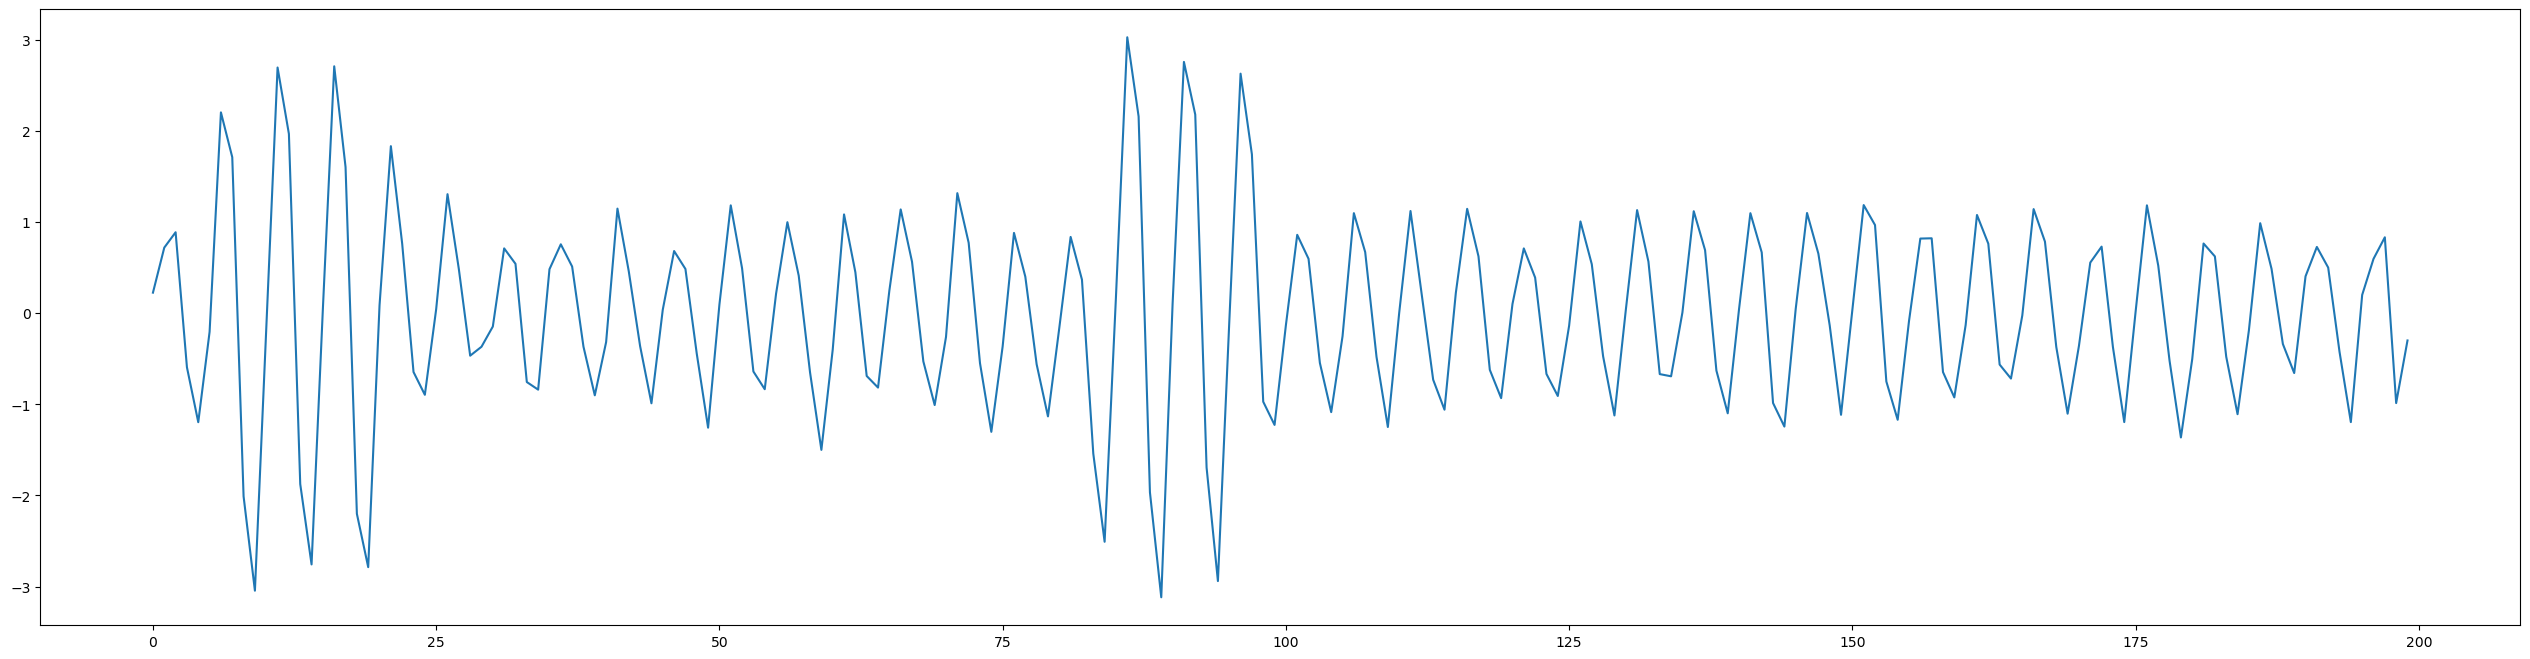

In [85]:
plt.figure(figsize=(32, 8))
plt.plot(train['value-0'][0:200])

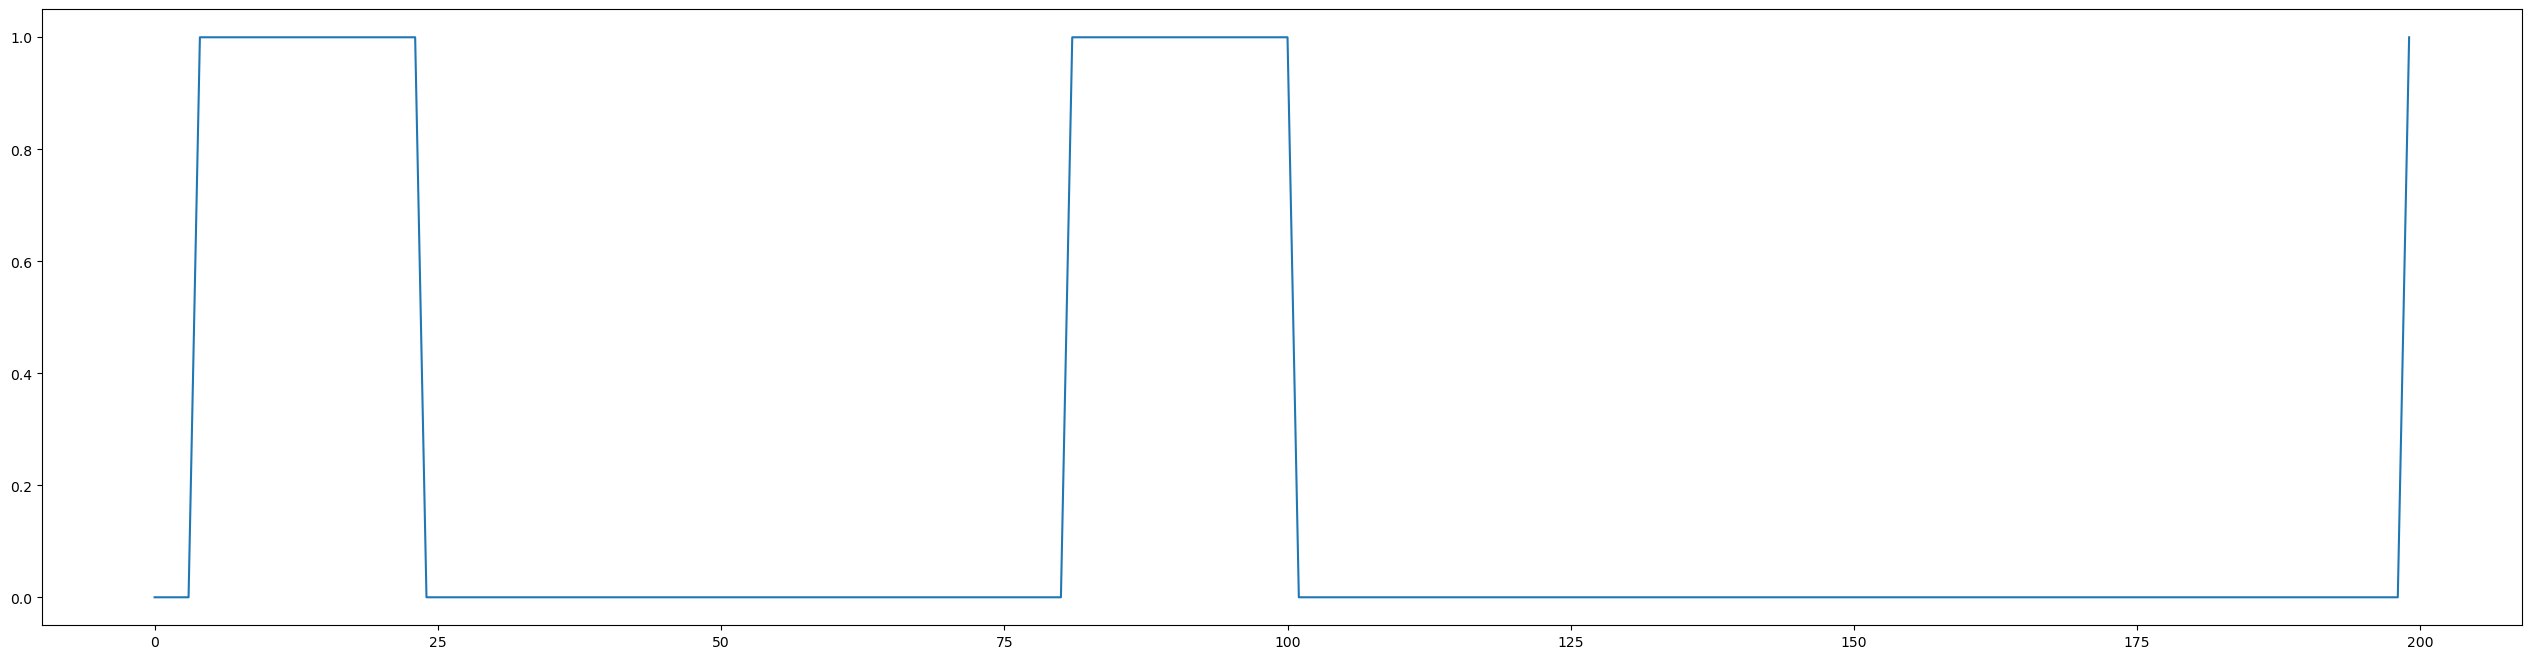

In [86]:
plt.figure(figsize=(32, 8))
plt.plot(train['is_anomaly'][0:200])

In [87]:
alist=[]                          # 뽑은 a를 넣어 중복 방지해주는 리스트         
for i in range(100):
    a = random.randint(0,150)       
    while a in alist :        # a가 이미 뽑은 리스트에 있을 때까지 다시 뽑자
        a = random.randint(0,150)
    alist.append(a) # 새로운 a 값을 리스트에 추가
alist = np.array(alist, dtype = int)
alist *= 100
alist.sort()
alist = alist.tolist()

anomalies = []

for i in alist:
    rand_idx = random.randint(0, 2)
    temp = copy.deepcopy(anomaly_types[rand_idx])
    temp['exact-position'] = i
    anomalies.append(temp)
    del temp

In [88]:
from gutenTAG import GutenTAG, TrainingType, LABEL_COLUMN_NAME


config = {
    "timeseries": [
        {
            "name": "test",
            "length": 16000,
            "base-oscillations": [
                {"kind": "sine",
                'frequency': 20,
#                'amplitude':2.5,
                'variance':0.2},
                
            ],
            "anomalies": anomalies
        }
    ]
}
gutentag = GutenTAG(seed=42)
gutentag.load_config_dict(config)

# call generate() to create the datasets (in-memory)
datasets = gutentag.generate(return_timeseries=True)

# we only defined a single test time series
assert len(datasets) == 1
d = datasets[0]
assert d.name == "test"
assert d.training_type == TrainingType.TEST

# the data points are stored at
test = d.timeseries
test.iloc[:, 1:-1]
# the labels are stored at
test[LABEL_COLUMN_NAME]

Initializing addons: 0it [00:00, ?it/s]
Generating datasets: 100%|██████████| 1/1 [00:00<00:00, 14.26it/s]
Finalizing addons: 0it [00:00, ?it/s]


timestamp
0        1
1        1
2        1
3        1
4        1
        ..
15995    0
15996    0
15997    0
15998    0
15999    0
Name: is_anomaly, Length: 16000, dtype: int8

In [89]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm
import collections 
import time
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [90]:
n = 120
X_train_adl, X_train_fall, y_train_adl, y_train_fall = list(), list(), list(), list()

for i in tqdm(range(0, len(train)-n)):
    temp = list()
    
    temp.append(train['value-0'][i : i + n])
    
    cnt = collections.Counter(train['is_anomaly'][i: i + n])
    num_adl = cnt[0]
    num_fall = cnt[1]
    
    if num_fall == 20:
        y_train_fall.append(1)
        X_train_fall.append(temp)
                    
    elif num_fall == 0:
        y_train_adl.append(0)
        X_train_adl.append(temp)
    else:
        continue

100%|██████████| 15880/15880 [00:02<00:00, 6548.74it/s]


In [91]:
X_test_adl, X_test_fall, y_test_adl, y_test_fall, fall_range = list(), list(), list(), list(), list()
for i in tqdm(range(0, len(test) - n)):
    temp = list()
    
    temp.append(test['value-0'][i : i + n])
    
    cnt = collections.Counter(test['is_anomaly'][i : i + n])
    num_adl = cnt[0]
    num_fall = cnt[1]
    
    if num_fall == 20:
        y_test_fall.append(1)
        X_test_fall.append(temp)
                
        fall_range.append(test['is_anomaly'][i : i + n])
        
    elif num_fall == 0:
        y_test_adl.append(0)
        X_test_adl.append(temp)
    else:
        continue

100%|██████████| 15880/15880 [00:03<00:00, 4618.99it/s]


In [92]:
index = 3

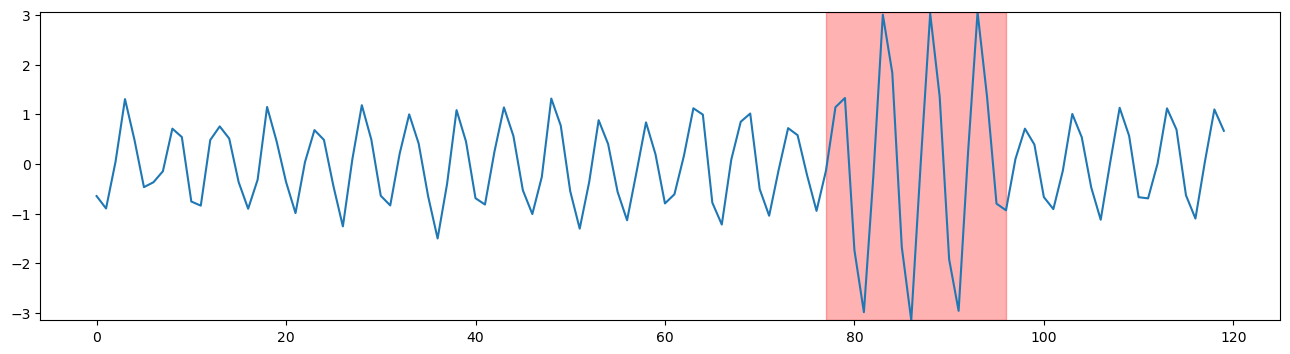

In [93]:
import numpy as np
import matplotlib.pyplot as plt

# fall_range[index]에서 값이 1인 부분의 시작과 끝 인덱스 찾기
ones = np.where(fall_range[index] == 1)[0]
start_indices = np.where(np.diff(ones) != 1)[0] + 1
start_indices = np.insert(start_indices, 0, 0)
end_indices = np.where(np.diff(ones) != 1)[0]
end_indices = np.append(end_indices, len(ones) - 1)
plt.figure(figsize=(16, 4))
# Plot
x = np.array(X_test_fall[index]).transpose(1, 0)
plt.plot(x)

y1 = min(np.min(x), 0)
y2 = max(np.max(x), 1)

# 각 값이 1인 부분에 대해 빨간색 배경 추가
for start, end in zip(start_indices, end_indices):
    plt.fill_betweenx([y1, y2], ones[start], ones[end], color='red', alpha=0.3)

plt.ylim(y1, y2)
plt.show()


In [94]:
print(len(y_train_fall))
print(len(y_train_adl))

4483
6163


In [95]:
print(len(y_test_fall))
print(len(y_test_adl))

7499
4556


# 확인

In [96]:
a = min(len(y_train_fall), len(y_train_adl))
b = min(len(y_test_fall), len(y_test_adl))

In [97]:
X_train_adl = X_train_adl[:a]
y_train_adl = y_train_adl[:a]

y_train = y_train_adl + y_train_fall[:a]
X_train = X_train_adl + X_train_fall[:a]

In [98]:
X_test_adl = X_test_adl[:b]
y_test_adl = y_test_adl[:b]

y_test = y_test_adl + y_test_fall[:b]
X_test = X_test_adl + X_test_fall[:b]

In [99]:
fall_num = b

In [100]:
print(len(y_test_fall))
print(len(y_test_adl))

7499
4556


In [101]:
print('length of test data', len(X_test))

length of test data 9112


In [102]:
print('train data adl and fall ratio')
print('--------------------------------')
cnt_train = collections.Counter(y_train)
print('train data adl ratio: ', cnt_train[0])
print('train data fall ratio: ', cnt_train[1])
print('--------------------------------')

cnt_test = collections.Counter(y_test)
print('test data adl ratio: ', cnt_test[0])
print('test data fall ratio: ', cnt_test[1])

train data adl and fall ratio
--------------------------------
train data adl ratio:  4483
train data fall ratio:  4483
--------------------------------
test data adl ratio:  4556
test data fall ratio:  4556


In [103]:
np.asarray(X_train).transpose(0, 2, 1).shape

(8966, 120, 1)

In [104]:
X_train = np.asarray(X_train).transpose(0, 2, 1)
y_train = np.asarray(y_train).reshape(-1, )

X_test = np.asarray(X_test).transpose(0, 2, 1)
y_test = np.asarray(y_test).reshape(-1, )

In [105]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

y_train = enc.fit_transform(y_train)
y_test = enc.fit_transform(y_test)

In [106]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8966, 120, 1), (8966,), (9112, 120, 1), (9112,))

In [107]:
fall_segment = np.asarray(fall_range)[:fall_num]

In [108]:
fall_segment.shape

(4556, 120)

In [109]:
np.where(y_train == 1)

(array([4483, 4484, 4485, ..., 8963, 8964, 8965]),)

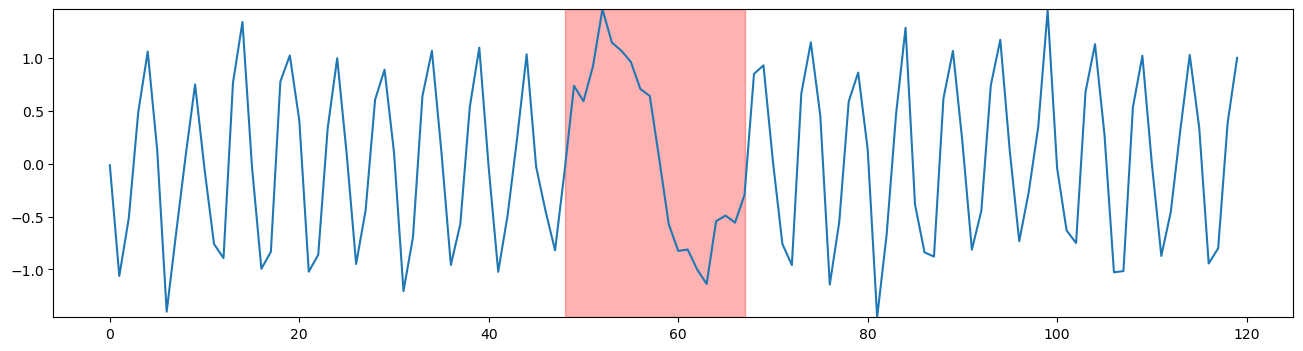

In [110]:
import numpy as np
import matplotlib.pyplot as plt

# fall_range[index]에서 값이 1인 부분의 시작과 끝 인덱스 찾기
ones = np.where(fall_segment[-1000] == 1)[0]
start_indices = np.where(np.diff(ones) != 1)[0] + 1
start_indices = np.insert(start_indices, 0, 0)
end_indices = np.where(np.diff(ones) != 1)[0]
end_indices = np.append(end_indices, len(ones) - 1)
plt.figure(figsize=(16, 4))
# Plot
x = np.array(X_test[-1000])
plt.plot(x)

y1 = min(np.min(x), 0)
y2 = max(np.max(x), 1)

# 각 값이 1인 부분에 대해 빨간색 배경 추가
for start, end in zip(start_indices, end_indices):
    plt.fill_betweenx([y1, y2], ones[start], ones[end], color='red', alpha=0.3)

plt.ylim(y1, y2)
plt.show()


In [111]:
X_train.shape, y_train.shape

((8966, 120, 1), (8966,))

In [112]:
np.where(y_test==0)

(array([   0,    1,    2, ..., 4553, 4554, 4555]),)

<hr>
일단 여기까지

In [39]:
X_train_dim1 = X_train.copy()
y_train_dim1 = y_train.copy()
X_test_dim1 = X_test.copy()
y_test_dim1 = y_test.copy()
fall_seg_dim1 = fall_segment.copy()

In [76]:
X_train_dim2 = X_train.copy()
y_train_dim2 = y_train.copy()
X_test_dim2 = X_test.copy()
y_test_dim2 = y_test.copy()
fall_seg_dim2 = fall_segment.copy()

In [113]:
X_train_dim3 = X_train.copy()
y_train_dim3 = y_train.copy()
X_test_dim3 = X_test.copy()
y_test_dim3 = y_test.copy()
fall_seg_dim3 = fall_segment.copy()

In [124]:
train_dim1_start = np.where(y_train_dim1 == 1)[0][0]
train_dim1_start

5355

In [115]:
np.where(y_train_dim1 == 1)[0][-1] - np.where(y_train_dim1 == 1)[0][0]

5354

In [125]:
train_dim2_start = np.where(y_train_dim2 == 1)[0][0]
train_dim2_start

5541

In [117]:
np.where(y_train_dim2 == 1)[0][-1] - np.where(y_train_dim2 == 1)[0][0]

5540

In [126]:
train_dim3_start = np.where(y_train_dim3 == 1)[0][0]
train_dim3_start

4483

In [127]:
np.where(y_train_dim3 == 1)[0][-1] - np.where(y_train_dim3 == 1)[0][0]

4482

In [121]:
x1 = 4483

In [128]:
gap = min(np.where(y_train_dim1 == 1)[0][-1] - np.where(y_train_dim1 == 1)[0][0], np.where(y_train_dim2 == 1)[0][-1] - np.where(y_train_dim2 == 1)[0][0], np.where(y_train_dim3 == 1)[0][-1] - np.where(y_train_dim3 == 1)[0][0])
gap

4482

In [122]:
combined_X_train1 = np.concatenate([X_train_dim1[:x1], X_train_dim2[:x1], X_train_dim3[:x1]], axis=2)

In [129]:
combined_X_train2 = np.concatenate([X_train_dim1[train_dim1_start:train_dim1_start+gap], X_train_dim2[train_dim2_start:train_dim2_start+gap],\
                                    X_train_dim3[train_dim3_start:train_dim3_start+gap]], axis=2)

In [130]:
combined_X_train1.shape, combined_X_train2.shape

((4483, 120, 3), (4482, 120, 3))

In [131]:
combined_X_train = np.concatenate([combined_X_train1, combined_X_train2], axis = 0)

In [132]:
combined_X_train.shape

(8965, 120, 3)

In [133]:
y_train_dim1.shape

(10710,)

In [137]:
combined_y_train = np.concatenate([y_train_dim1[:x1], y_train_dim1[train_dim1_start:train_dim1_start+gap]])

In [138]:
combined_y_train.shape

(8965,)

<hr>
여기까지 Train 만들었음

In [139]:
test_dim1_start = np.where(y_test_dim1 == 1)[0][0]
test_dim2_start = np.where(y_test_dim2 == 1)[0][0]
test_dim3_start = np.where(y_test_dim3 == 1)[0][0]
test_dim1_start, test_dim2_start, test_dim3_start


(4554, 4751, 4556)

In [141]:
x2 = min(test_dim1_start, test_dim2_start, test_dim3_start)

In [140]:
gap = min(np.where(y_test_dim1 == 1)[0][-1] - np.where(y_test_dim1 == 1)[0][0], np.where(y_test_dim2 == 1)[0][-1] - np.where(y_test_dim2 == 1)[0][0], np.where(y_test_dim3 == 1)[0][-1] - np.where(y_test_dim3 == 1)[0][0])
gap

4553

In [142]:
combined_X_test1 = np.concatenate([X_test_dim1[:x2], X_test_dim2[:x2], X_test_dim3[:x2]], axis=2)

In [143]:
combined_X_test1.shape

(4554, 120, 3)

In [144]:
combined_X_test2 = np.concatenate([X_test_dim1[test_dim1_start:test_dim1_start+gap], X_test_dim2[test_dim2_start:test_dim2_start+gap], X_test_dim3[test_dim3_start:test_dim3_start+gap]], axis=2)

In [145]:
combined_X_test2.shape

(4553, 120, 3)

In [146]:
combined_X_test = np.concatenate([combined_X_test1, combined_X_test2], axis = 0)

In [147]:
combined_X_test.shape

(9107, 120, 3)

In [148]:
combined_y_test = np.concatenate([y_test_dim1[:x2], y_test_dim1[test_dim1_start:test_dim1_start+gap]])

In [149]:
combined_y_test.shape

(9107,)

In [150]:
fall_seg_dim1.shape, fall_seg_dim2.shape, fall_seg_dim3.shape

((4554, 120), (4751, 120), (4556, 120))

In [151]:
fall_seg_dim1 = np.expand_dims(fall_seg_dim1, axis=2)
fall_seg_dim2 = np.expand_dims(fall_seg_dim2, axis=2)
fall_seg_dim3 = np.expand_dims(fall_seg_dim3, axis=2)

In [152]:
fall_seg_dim1.shape, fall_seg_dim2.shape, fall_seg_dim3.shape

((4554, 120, 1), (4751, 120, 1), (4556, 120, 1))

In [153]:
combined_fall_seg = np.concatenate([fall_seg_dim1[:x2], fall_seg_dim2[:x2], fall_seg_dim3[:x2]], axis=2)

In [154]:
combined_fall_seg.shape

(4554, 120, 3)

In [155]:
np.save('./multi_syn_train.npy', combined_X_train)
np.save('./multi_syn_train_label.npy', combined_y_train)
np.save('./multi_syn_test.npy', combined_X_test)
np.save('./multi_syn_test_label.npy', combined_y_test)
np.save('./multi_syn_range.npy', combined_fall_seg)

# 데이터 시각화 샘플

In [159]:
test = np.load('./multi_syn_test.npy')

In [160]:
fall = np.load('./multi_syn_range.npy')

In [171]:
fall_num = 6777

In [172]:
ones = np.where(fall[fall_num-4556] == 1)[0]

In [173]:
start_indices = np.where(np.diff(ones) != 1)[0] + 1
start_indices = np.insert(start_indices, 0, 0)
end_indices = np.where(np.diff(ones) != 1)[0]
end_indices = np.append(end_indices, len(ones) - 1)

In [174]:
y1 = min(np.min(test[fall_num]), 0)
y2 = max(np.max(test[fall_num]), 1)

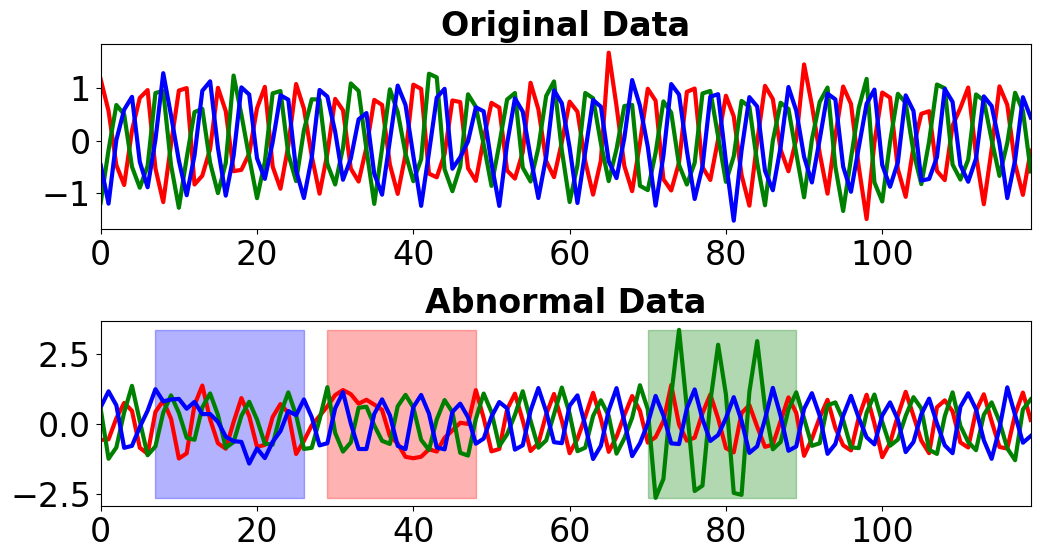

In [183]:
# test = np.random.rand(1, 120, 3)
# mask_array = np.random.randint(0, 2, size=(1, 120, 3))

fig, axs = plt.subplots(2, 1, figsize=(12, 6))
plt.subplots_adjust(hspace=0.5)

# A subplot
# axs[0].plot(test[2324], linewidth=3)
colors = ['r', 'g', 'b']
for i, channel in enumerate(test[3333].T):
    axs[0].plot(channel, color=colors[i], linewidth=3)

axs[0].set_title('Original Data', fontsize=24, fontweight='bold')
axs[0].tick_params(axis='both', labelsize=24)
axs[0].set_xlim(0, 119)

# B subplot
axs[1].set_title('Abnormal Data', fontsize=24, fontweight='bold')
axs[1].tick_params(axis='both', labelsize=24)
axs[1].set_xlim(0, 119)

# Plot each channel individually with fill_between for mask_array == 1
colors = ['r', 'g', 'b']
for i, channel in enumerate(test[fall_num].T):
    axs[1].plot(channel, color=colors[i], linewidth=3)
    ones = np.where(fall[fall_num-4556, :, i] == 1)[0]
    axs[1].fill_betweenx([np.min(test[fall_num]), np.max(test[fall_num])], ones[0], ones[-1], color=colors[i], alpha=0.3)
#     for j in range(len(ones) - 1):
#         axs[1].fill_betweenx([np.min(test[fall_num]), np.max(test[fall_num])], ones[j], ones[j+1], color=colors[i], alpha=0.3)
#         axs[1].fill_betweenx([min(channel), max(channel)], ones[j], ones[j+1], color=colors[i], alpha=0.3)
#         axs[1].fill_between(range(ones[j], ones[j+1]+1), channel[ones[j]:ones[j+1]+1], color=colors[i], alpha=0.3)
    

# fig.text(0.5, -0.01, 'Time', ha='center', fontsize=24)
# fig.text(0.05, 0.5, 'Value', va='center', rotation='vertical', fontsize=24)

plt.show()

In [177]:
단변량 다변량 둘다 띄우기
A,B가 아님
Original Data, Abnormal Data 로 변경

Dimension

실험

Synthetic Data Eval

Real Data


SyntaxError: invalid syntax (3091421837.py, line 1)

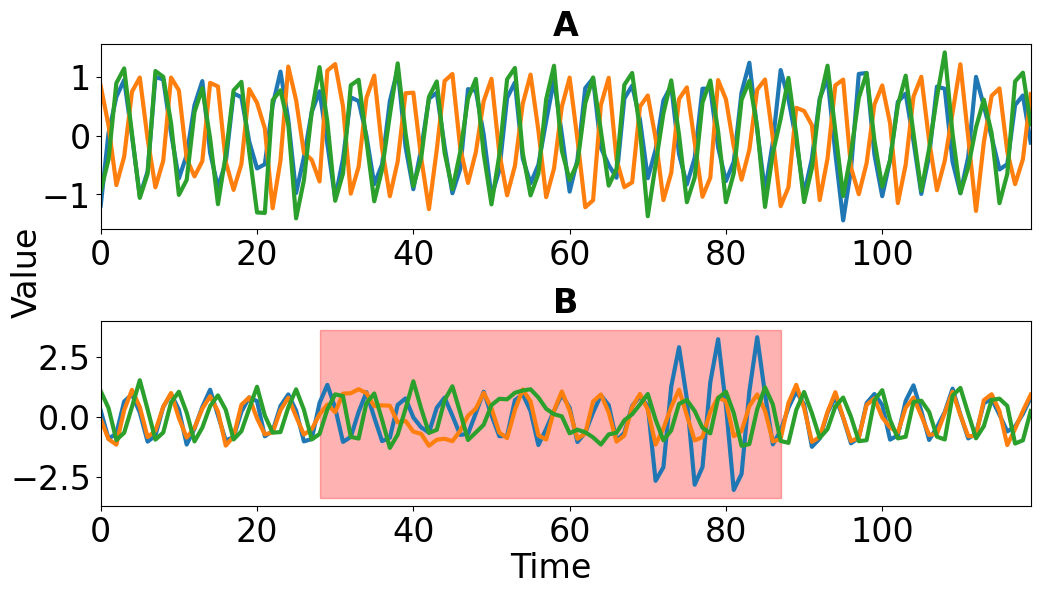

In [237]:
fig, axs = plt.subplots(2, 1, figsize=(12, 6))
plt.subplots_adjust(hspace=0.5)

axs[0].plot(test[2324], linewidth=3)
axs[0].tick_params(axis='both', labelsize=24)
axs[0].set_title('A', fontsize=24, fontweight="bold")


axs[1].plot(test[fall_num], linewidth=3)
axs[1].tick_params(axis='both', labelsize=24)
axs[1].set_title('B', fontsize=24, fontweight="bold")

axs[0].set_xlim(0, 119)
axs[1].set_xlim(0, 119)

y1, y2 = axs[1].get_ylim()
axs[1].fill_betweenx([y1, y2], ones[0], ones[-1], color='red', alpha=0.3)
fig.text(0.5, -0.01, 'Time', ha='center', fontsize=24)
fig.text(0.05, 0.5, 'Value', va='center', rotation='vertical', fontsize=24)

plt.show()

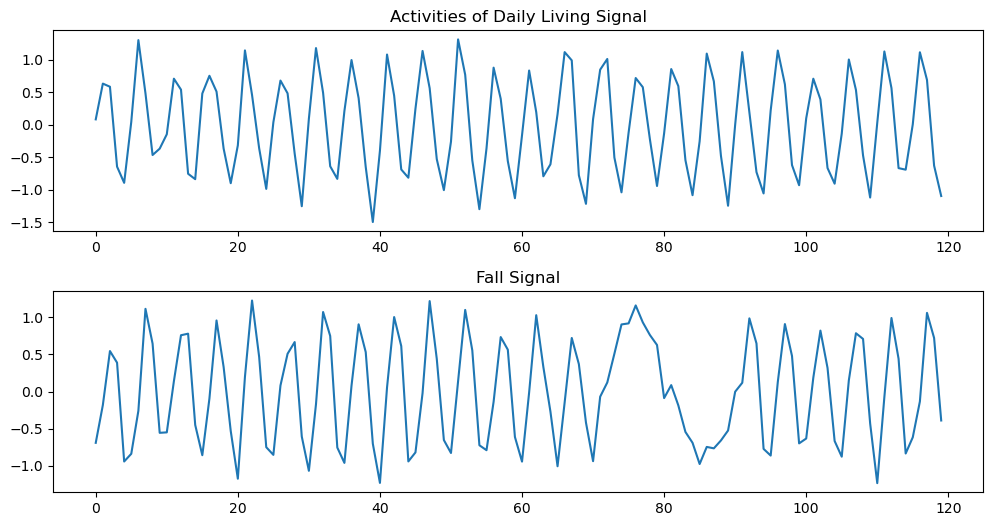

In [110]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(test[0])
plt.title('Activities of Daily Living Signal')
plt.subplot(2, 1, 2)
plt.plot(test[5004])

plt.subplots_adjust(hspace=0.3)  # hspace 값을 조절하여 상하 간격을 변경하세요.
plt.title('Fall Signal')
plt.show()